# KNN demo

In [1]:
import numpy as np
from ml_lib.neighbors import KNN
import matplotlib.pyplot as plt


- simple data

[[1 1]
 [1 2]
 [2 1]
 [2 2]
 [6 6]
 [6 7]
 [7 6]
 [7 7]] 
 [0. 0. 0. 0. 1. 1. 1. 1.]


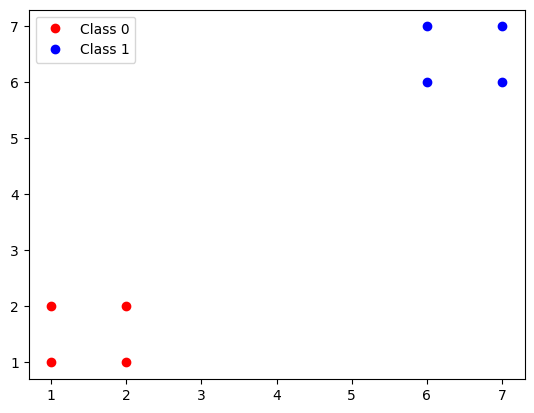

In [6]:
X_class0 = np.array([
    [1, 1],
    [1, 2],
    [2, 1],
    [2, 2]
])

y_class0 = np.zeros(len(X_class0))

# Class 1 points
X_class1 = np.array([
    [6, 6],
    [6, 7],
    [7, 6],
    [7, 7]
])

y_class1 = np.ones(len(X_class1))

# Combine
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

print(X, "\n", y)
plt.plot(X_class0[:, 0], X_class0[:, 1], 'ro', label='Class 0')
plt.plot(X_class1[:, 0], X_class1[:, 1], 'bo', label='Class 1')
plt.legend()    
plt.show()


### Training the KNN model

In [7]:
model = KNN(k=3, task="classification")
model.fit(X, y)

preds = model.predict(X)
print("Predictions:", preds)


Predictions: [0. 0. 0. 0. 1. 1. 1. 1.]


- visualizing the predictions boundary line

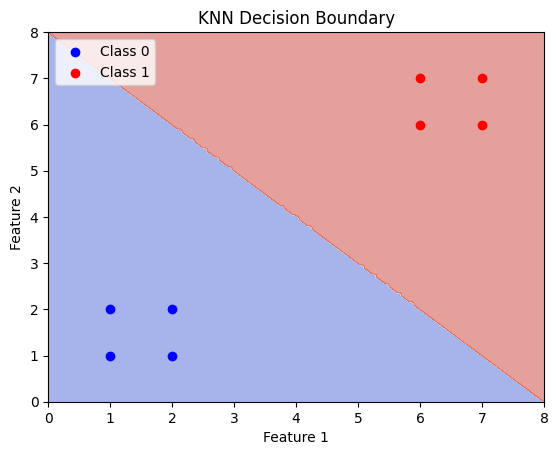

In [9]:
# Create grid
x_min, x_max = 0, 8
y_min, y_max = 0, 8

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# Flatten grid
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict for every grid point
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.5, cmap="coolwarm")

# Plot training points
plt.scatter(X_class0[:, 0], X_class0[:, 1], color="blue", label="Class 0")
plt.scatter(X_class1[:, 0], X_class1[:, 1], color="red", label="Class 1")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("KNN Decision Boundary")
plt.show()


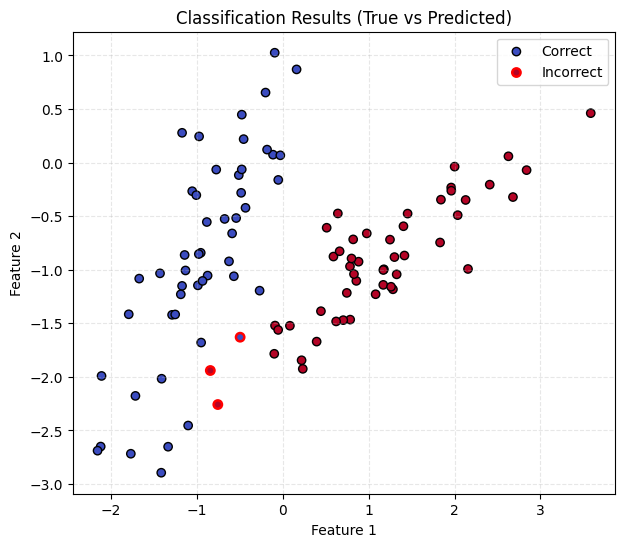

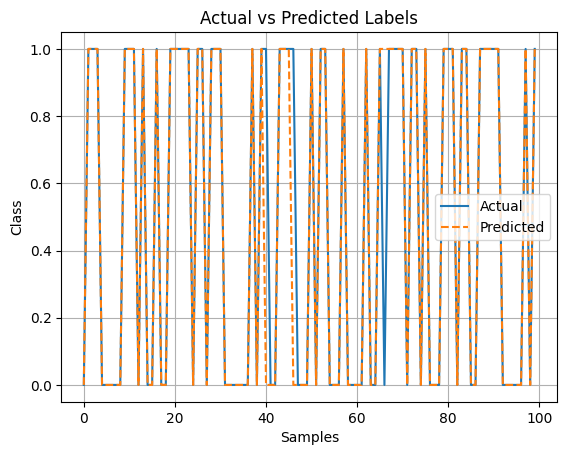

In [2]:
from ml_lib.utils.visuals.classification_plots import plot_classification_results,plot_prediction_comparison
from sklearn.datasets import make_classification

X_sklearn, y_sklearn = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=5)

knn = KNN(k= 5, task="classification")
knn.fit(X_sklearn, y_sklearn)
y_preds = knn.predict(X_sklearn)
plot_classification_results(X_sklearn, y_sklearn, y_preds)
plot_prediction_comparison(y_sklearn, y_preds)




